# Zadanie 1a (3 pkt)
Celem zadania jest rozwiązanie problemu plecakowego dwoma metodami - brute force oraz według zadanej heurystyki. Należy zaimplementować metody klasy *KnapSack* - *solve_knapsack_brute_force* oraz *solve_knapsack_pw_ratio*. Poprzez rozwiązanie problemu rozumiemy podanie które przedmioty (indeksy w tablicy) należy spakować do plecaka oraz jaka jest sumaryczna wartość i masa plecaka. Punktacja wygląda następująco:


*   Rozwiązanie problemu metodą brute force. *Podpowiedź: do wygenerowania wszystkich permutacji można użyć funkcji product z biblioteki itertools* - **1.5 pkt**
*   Rozwiązanie problemu według heurystyki - do plecaka pakujemy przedmioty według stosunku wartości do wagi - **1 pkt**
*   Dla metody brute force proszę wygenerować wykres zależności czasu wykonywania metody od liczby elementów w tablicach *weights* i *profits* (do obu tablic należy stopniowo dopisywać po jednym elemencie, np. 10-krotnie, wartości elementów nie mają znaczenia). Proszę również odpowiedzieć na pytania (w osobnej komórce tekstowej) - czy obie metody mają takie same rozwiązania? Jakie są Pani / Pana wnioski? - **0.5 pkt**




In [2]:
import numpy as np
from itertools import product
from random import randint
import time
import matplotlib.pyplot as plt


In [3]:
weights = np.array([8, 3, 5, 2])
capacity = 9
profits = np.array([16, 8, 9, 6])


In [4]:
class KnapSack:
    def __init__(self, profits, weights, capacity):
        self.profits = profits
        self.weights = weights
        self.capacity = capacity
        
  
    def solve_knapsack_brute_force(self):
        best_combination = None
        best_profit = 0
        best_weight = 0
        combinations = product([0, 1], repeat=len(self.weights))
        
        for selected_items in combinations:
            sum_weights = sum(weight for weight, selected in
                             zip(self.weights, selected_items) if selected == 1)
            if sum_weights > self.capacity:
                continue
            sum_profits = sum(profit for profit, selected in
                              zip(self.profits, selected_items) if selected == 1)
            
            if sum_profits > best_profit:
                best_profit = sum_profits
                best_weight = sum_weights
                best_combination = selected_items
        
        return [i for i, selected in enumerate(best_combination) if selected == 1], best_profit, best_weight


    def solve_knapsack_pw_ratio(self):
        pw_ratios = [(i, self.profits[i]/self.weights[i]) for i in range(len(self.weights))]
        pw_ratios.sort(key=lambda x: x[1], reverse=True)
        
        sum_weights = 0
        sum_profits = 0
        selected_items = []
        
        for i, _ in pw_ratios:
            if sum_weights + self.weights[i] <= self.capacity:
                selected_items.append(i)
                sum_weights += self.weights[i]
                sum_profits += self.profits[i]
                
        return selected_items, sum_profits, sum_weights
                

## Podstawowy test działania napisanych metod

In [5]:
knap_sack = KnapSack(profits, weights, capacity)

print(f"Brute force method solve at capacity = {capacity}")
selected_items, sum_profits, sum_weights = knap_sack.solve_knapsack_brute_force()
print(f"Selected items: {selected_items}; profits sum: {sum_profits}; weights sum: {sum_weights}\n")

print(f"Heuristic pw ratio method solve at capacity = {capacity}")
selected_items, sum_profits, sum_weights = knap_sack.solve_knapsack_pw_ratio()
print(f"Selected items: {selected_items}; profits sum: {sum_profits}; weights sum: {sum_weights}\n")

Brute force method solve at capacity = 9
Selected items: [1, 2]; profits sum: 17; weights sum: 8

Heuristic pw ratio method solve at capacity = 9
Selected items: [3, 1]; profits sum: 14; weights sum: 5



Jak widać, obie metody zwróciły inne wyniki. Nie świadczy to jednak o ich złym działaniu. Metoda brute force sprawdza wszystkie możliwe kombinacje i porównuje zyski dla wszystkich dopuszczalnych kombinacji. Dlatego też zwraca ona zawsze najlepsze możliwe rozwiązanie problemu plecakowego. Metoda heurystyczna niestety nie zawsze zwraca optymalne rozwiązanie, co zależy w dużej mierze od rozważanych wag i zysków z poszczególnych przedmiotów. Jej zaletą jest natomiast większa szybkość działania.
## Analiza wydajności napisanych metod

In [20]:
max_weight = 20
max_profit = 20

max_elements_number1 = 20
max_elements_number2 = 200

iteration_number = 10


In [6]:
# Brute force method test

weights1 = weights.copy()
profits1 = profits.copy()

execution_times1 = []
elements_numbers1 = []

for _ in range(max_elements_number1 - len(weights)):
    weights1 = np.append(weights1, randint(1, max_weight))
    profits1 = np.append(profits1, randint(1, max_profit))
    
    knap_sack = KnapSack(profits1, weights1, capacity)
    elements_numbers1.append(len(weights1))
    
    same_parameters_execution_times = []
    for __ in range(iteration_number):
        start_time = time.process_time()
        knap_sack.solve_knapsack_brute_force()
        end_time = time.process_time()
        same_parameters_execution_times.append(end_time - start_time)
        
    average_execution_time = sum(same_parameters_execution_times)/iteration_number
    execution_times1.append(average_execution_time)
    
    print(f"Brute force method;\t Items number: {len(weights1)};\t average execution time: {average_execution_time}")
    

Brute force method;	 Items number: 5;	 execution time: 0.00016306480000007894
Brute force method;	 Items number: 6;	 execution time: 0.0003089601999999747
Brute force method;	 Items number: 7;	 execution time: 0.0005742074000000041
Brute force method;	 Items number: 8;	 execution time: 0.0011980345999999642
Brute force method;	 Items number: 9;	 execution time: 0.0023125989999999595
Brute force method;	 Items number: 10;	 execution time: 0.00475605180000005
Brute force method;	 Items number: 11;	 execution time: 0.007109495399999943
Brute force method;	 Items number: 12;	 execution time: 0.010593643999999935
Brute force method;	 Items number: 13;	 execution time: 0.022116416699999995
Brute force method;	 Items number: 14;	 execution time: 0.0819049841
Brute force method;	 Items number: 15;	 execution time: 0.24057140899999996
Brute force method;	 Items number: 16;	 execution time: 0.2342972866000001
Brute force method;	 Items number: 17;	 execution time: 0.5802013906999999
Brute force 

In [21]:
# Heuristic pw method test

weights2 = weights.copy()
profits2 = profits.copy()

execution_times2 = []
elements_numbers2 = []

for _ in range(max_elements_number2 - len(weights)):
    weights2 = np.append(weights2, randint(1, max_weight))
    profits2 = np.append(profits2, randint(1, max_profit))
    
    knap_sack = KnapSack(profits2, weights2, capacity)
    elements_numbers2.append(len(weights2))
    
    same_parameters_execution_times = []
    for __ in range(iteration_number):
        start_time = time.process_time()
        knap_sack.solve_knapsack_pw_ratio()
        end_time = time.process_time()
        same_parameters_execution_times.append(end_time - start_time)
        
    average_execution_time = sum(same_parameters_execution_times)/iteration_number
    execution_times2.append(average_execution_time)
    
    print(f"Heuristic pw method;\t Items number: {len(weights2)};\t average execution time: {average_execution_time}")
    

Heuristic pw method;	 Items number: 5;	 average execution time: 1.8815600003563305e-05
Heuristic pw method;	 Items number: 6;	 average execution time: 8.991200002128607e-06
Heuristic pw method;	 Items number: 7;	 average execution time: 9.250799996607384e-06
Heuristic pw method;	 Items number: 8;	 average execution time: 8.399800003644487e-06
Heuristic pw method;	 Items number: 9;	 average execution time: 8.797400005278177e-06
Heuristic pw method;	 Items number: 10;	 average execution time: 1.0862100000963438e-05
Heuristic pw method;	 Items number: 11;	 average execution time: 1.0849700001358541e-05
Heuristic pw method;	 Items number: 12;	 average execution time: 1.1669100004496613e-05
Heuristic pw method;	 Items number: 13;	 average execution time: 1.2996199998838165e-05
Heuristic pw method;	 Items number: 14;	 average execution time: 1.2616300000445336e-05
Heuristic pw method;	 Items number: 15;	 average execution time: 1.2932899997508684e-05
Heuristic pw method;	 Items number: 16;	 

### Wykresy czasu obliczeń w zależności od ilości przedmiotów dla obu metod

Text(0.5, 1.0, 'Czas wykonania zadania metodą Brute force w zależności od liczby przedmiotów')

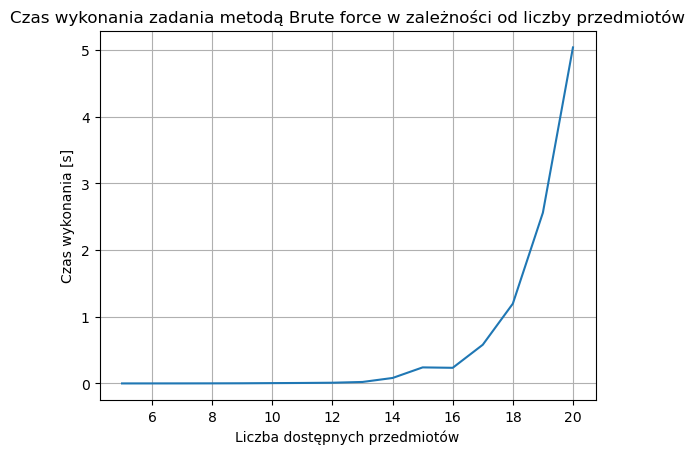

In [11]:
plt.plot(elements_numbers1, execution_times1)
plt.grid()
plt.ylabel("Czas wykonania [s]")
plt.xlabel("Liczba dostępnych przedmiotów")
plt.title("Czas wykonania zadania metodą Brute force w zależności od liczby przedmiotów")


Text(0.5, 1.0, 'Czas wykonania zadania metodą Heurystyczną pw w zależności od liczby przedmiotów')

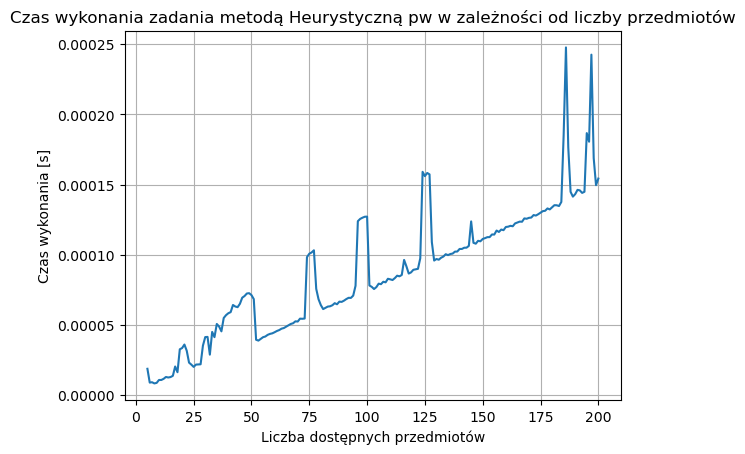

In [22]:
plt.plot(elements_numbers2, execution_times2)
plt.grid()
plt.ylabel("Czas wykonania [s]")
plt.xlabel("Liczba dostępnych przedmiotów")
plt.title("Czas wykonania zadania metodą Heurystyczną pw w zależności od liczby przedmiotów")

Text(0.5, 1.0, 'Porównanie szybkości działania metody Brute force oraz Heurystycznej')

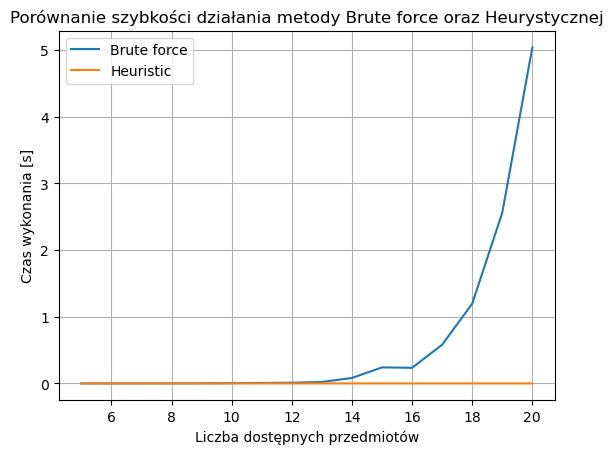

In [27]:
plt.plot(elements_numbers1, execution_times1, label="Brute force")
plt.plot(elements_numbers1, execution_times2[:len(elements_numbers1)], label="Heuristic")
plt.grid()
plt.legend()
plt.ylabel("Czas wykonania [s]")
plt.xlabel("Liczba dostępnych przedmiotów")
plt.title("Porównanie szybkości działania metody Brute force oraz Heurystycznej")

## Podsumowanie i wnioski

